## Multiple Linear Regression

### What is it?
**Multiple Linear Regression (MLR)** is an extension of simple linear regression that models the relationship between one **dependent variable (Y)** and **two or more independent variables (X₁, X₂, ..., Xₙ)**.  
It aims to find the **best-fitting hyperplane** that predicts the dependent variable using a linear combination of the inputs.

---

### Formula
\[
Y = β_0 + β_1X_1 + β_2X_2 + ... + β_nX_n + ε
\]

Where:  
- \( Y \): Dependent variable (target)  
- \( X_i \): Independent variables (predictors)  
- \( β_i \): Coefficients (weights learned by the model)  
- \( β_0 \): Intercept  
- \( ε \): Error term (residual)

---

### Intuition
Think of MLR as fitting a **multidimensional plane** through your data points.  
Each feature adds a new dimension, and the model adjusts the coefficients \(β_i\) so that the predicted values are as close as possible to the actual values of \(Y\).

- The **slope (β)** shows how much Y changes for a one-unit change in X, keeping others constant.  
- It’s like saying: “If everything else stays the same, how does changing X₁ affect Y?”

---

### Advantages
- Handles **multiple predictors**, allowing richer modeling than simple linear regression.  
- Easy to **interpret coefficients** and understand feature importance.  
- Works well for **prediction and inference** when linear assumptions roughly hold.  
- Fast to train and computationally efficient, even on large datasets.  
- Provides a solid baseline for comparison with more complex models.

---

### Disadvantages
- **Assumes linear relationships** — struggles when relationships are nonlinear.  
- Sensitive to **outliers** and **multicollinearity** (high correlation among predictors).  
- Performance drops when predictors are not independent or when data is noisy.  
- **Overfitting** can occur if too many variables are included relative to the sample size.  
- Interpretability declines as the number of predictors grows.

---

### Points to Remember
- Always **check multicollinearity** using Variance Inflation Factor (VIF).  
- Ensure **residuals are normally distributed and homoscedastic** (constant variance).  
- Use **feature scaling** when predictors differ greatly in scale.  
- Apply **adjusted R²** to evaluate goodness-of-fit for multiple predictors.  
- Don’t trust high R² blindly — correlation ≠ causation.  
- Regularization techniques (like **Ridge** or **Lasso**) can improve generalization.

---

📘 *In short:*  
Multiple Linear Regression is simple, interpretable, and powerful — but only if you respect its assumptions. Otherwise, it’s like using a ruler to measure a curve.


In [9]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
X,y = load_diabetes(return_X_y=True)

In [3]:
X.shape, X[:5]

((442, 10),
 array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
         -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
         -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
         -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034],
        [-0.08906294, -0.04464164, -0.01159501, -0.03665608,  0.01219057,
          0.02499059, -0.03603757,  0.03430886,  0.02268774, -0.00936191],
        [ 0.00538306, -0.04464164, -0.03638469,  0.02187239,  0.00393485,
          0.01559614,  0.00814208, -0.00259226, -0.03198764, -0.04664087]]))

In [4]:
y.shape, y[:5]

((442,), array([151.,  75., 141., 206., 135.]))

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
print(X_train.shape)
print(X_test.shape)

(353, 10)
(89, 10)


In [10]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4399338661568968

In [11]:
reg.coef_, reg.intercept_

(array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
        -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
         861.12700152,   52.42112238]),
 np.float64(151.88331005254167))

## Making our own Linear Regression Class¶

In [12]:
class MeraLR:
    
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,X_train,y_train):
        X_train = np.insert(X_train,0,1,axis=1)
        
        # calcuate the coeffs
        betas = np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]
    
    def predict(self,X_test):
        y_pred = np.dot(X_test,self.coef_) + self.intercept_
        return y_pred

In [13]:
lr = MeraLR()
lr.fit(X_train,y_train)
X_train.shape

(353, 10)

In [14]:
np.insert(X_train,0,1,axis=1).shape

(353, 11)

In [15]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.43993386615689756

In [16]:
lr.coef_, lr.intercept_

(array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
        -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
         861.12700152,   52.42112238]),
 np.float64(151.8833100525417))

In [17]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [18]:
X,y = make_regression(n_samples=100, n_features=2, n_informative=2, n_targets=1, noise=50)

In [19]:
df = pd.DataFrame({'feature1':X[:,0],'feature2':X[:,1],'target':y})

In [20]:
df.shape

(100, 3)

In [21]:
df.head()

,feature1,feature2,target
0,-0.208248,-2.105326,-111.528104
1,-0.362232,0.225130,-1.921953
2,0.771697,0.423800,20.196823
3,-0.490636,2.758855,-10.923702
4,-1.312445,-0.046739,-25.874288


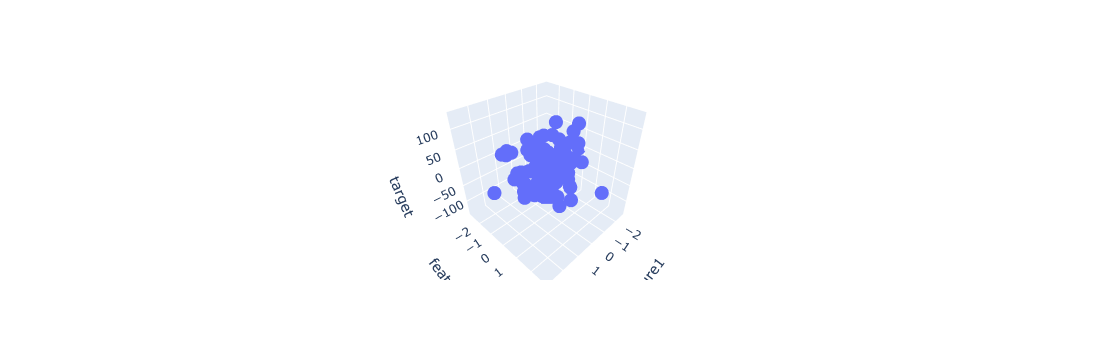

In [22]:
fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')

fig.show()

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr = LinearRegression()

In [26]:
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
y_pred = lr.predict(X_test)

In [28]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

MAE 48.13489883949903
MSE 3152.918082289283
R2 score 0.3272658780357889


In [29]:
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
xGrid, yGrid = np.meshgrid(y, x)

z_final = lr.predict(final).reshape(10,10)

z = z_final

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

NameError: name 'final' is not defined

In [225]:
fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')

fig.add_trace(go.Surface(x = x, y = y, z =z ))

fig.show()

In [226]:
lr.coef_

array([59.64518074, 13.20409431])

In [227]:
lr.intercept_

-7.55491251398082